# ¿PORQUÉ REGRESION LOGÍSTICA?

In [1]:


import os
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from plotnine import *

# Establecer directorio de trabajo
url = "https://raw.githubusercontent.com/JuanCarlosCS19/ML_Toulouse_ENE_2024/main/Clase2/cancer_mama.csv"

# Cargar el conjunto de datos
mi_data = pd.read_csv(url)

# Explorar el conjunto de datos
print(mi_data.shape)
print(mi_data.columns)

(569, 31)
Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'mean_compactness', 'mean_concavity',
       'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension',
       'radius_error', 'texture_error', 'perimeter_error', 'area_error',
       'smoothness_error', 'compactness_error', 'concavity_error',
       'concave_points_error', 'symmetry_error', 'fractal_dimension_error',
       'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area',
       'worst_smoothness', 'worst_compactness', 'worst_concavity',
       'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension',
       'diagnosis'],
      dtype='object')


In [2]:
mi_data

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [3]:
diagnosis_summary = mi_data['diagnosis'].value_counts()
print(diagnosis_summary)


1    357
0    212
Name: diagnosis, dtype: int64


In [4]:
# Transformar la variable 'diagnosis'

mi_data['diagnosis'] = mi_data['diagnosis'].replace({0: 1, 1: 0})

In [5]:
diagnosis_summary = mi_data['diagnosis'].value_counts()
print(diagnosis_summary)

0    357
1    212
Name: diagnosis, dtype: int64


   mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean_compactness  mean_concavity  mean_concave_points  mean_symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean_fractal_dimension  ...  worst_texture  worst_perimeter  worst_area  \
0             

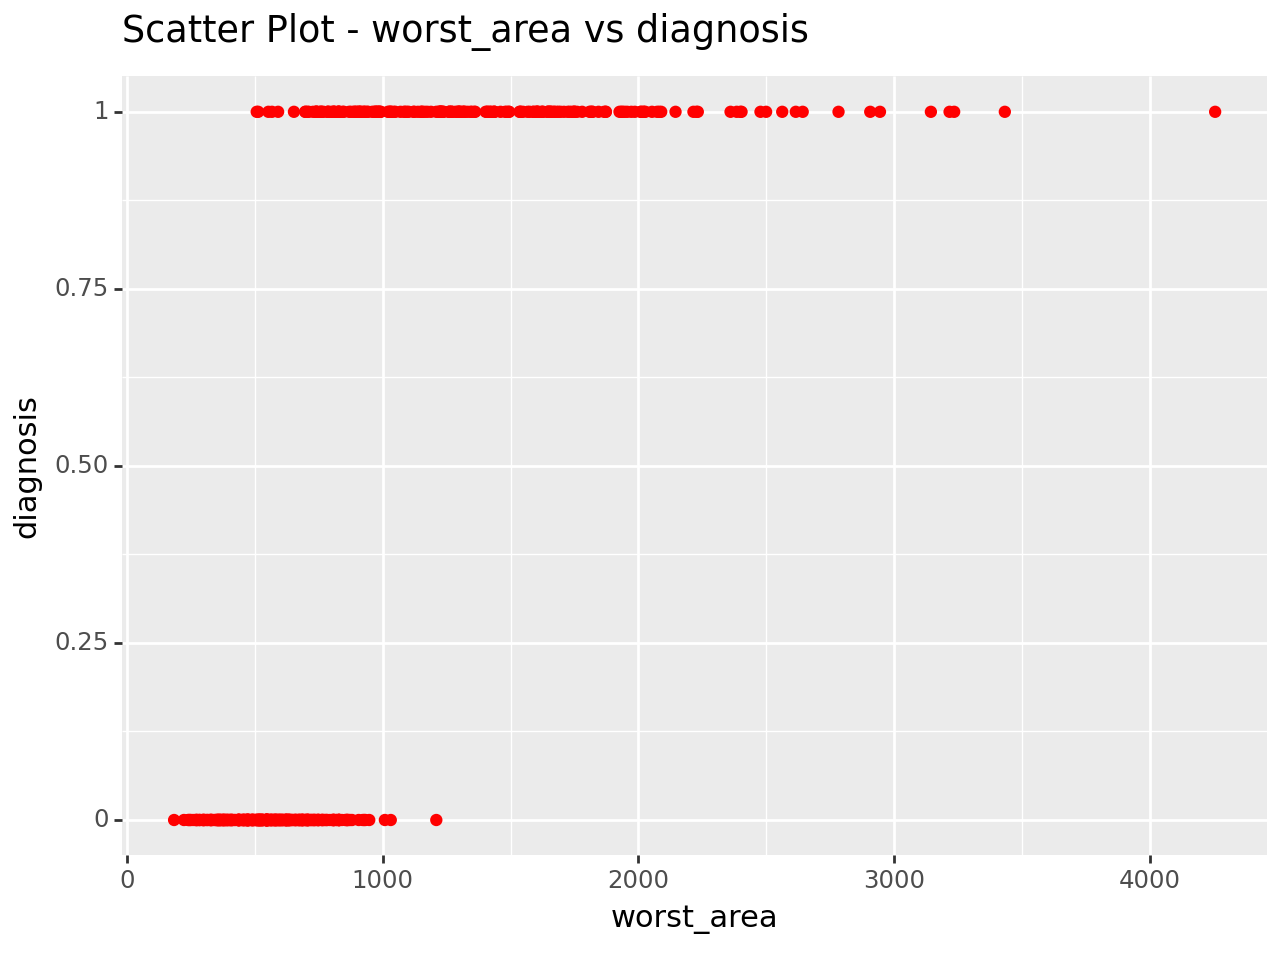

In [6]:


# Explorar el conjunto de datos después de la transformación
print(mi_data.head())

# Análisis de regresión lineal
data_peor_area = mi_data[['worst_area', 'diagnosis']]

# Visualización de los datos con ggplot
(ggplot(data_peor_area) +
 geom_point(aes(x='worst_area', y='diagnosis'), color='red') +
 labs(title='Scatter Plot - worst_area vs diagnosis')).draw()

<ipython-input-7-780b89a1126e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


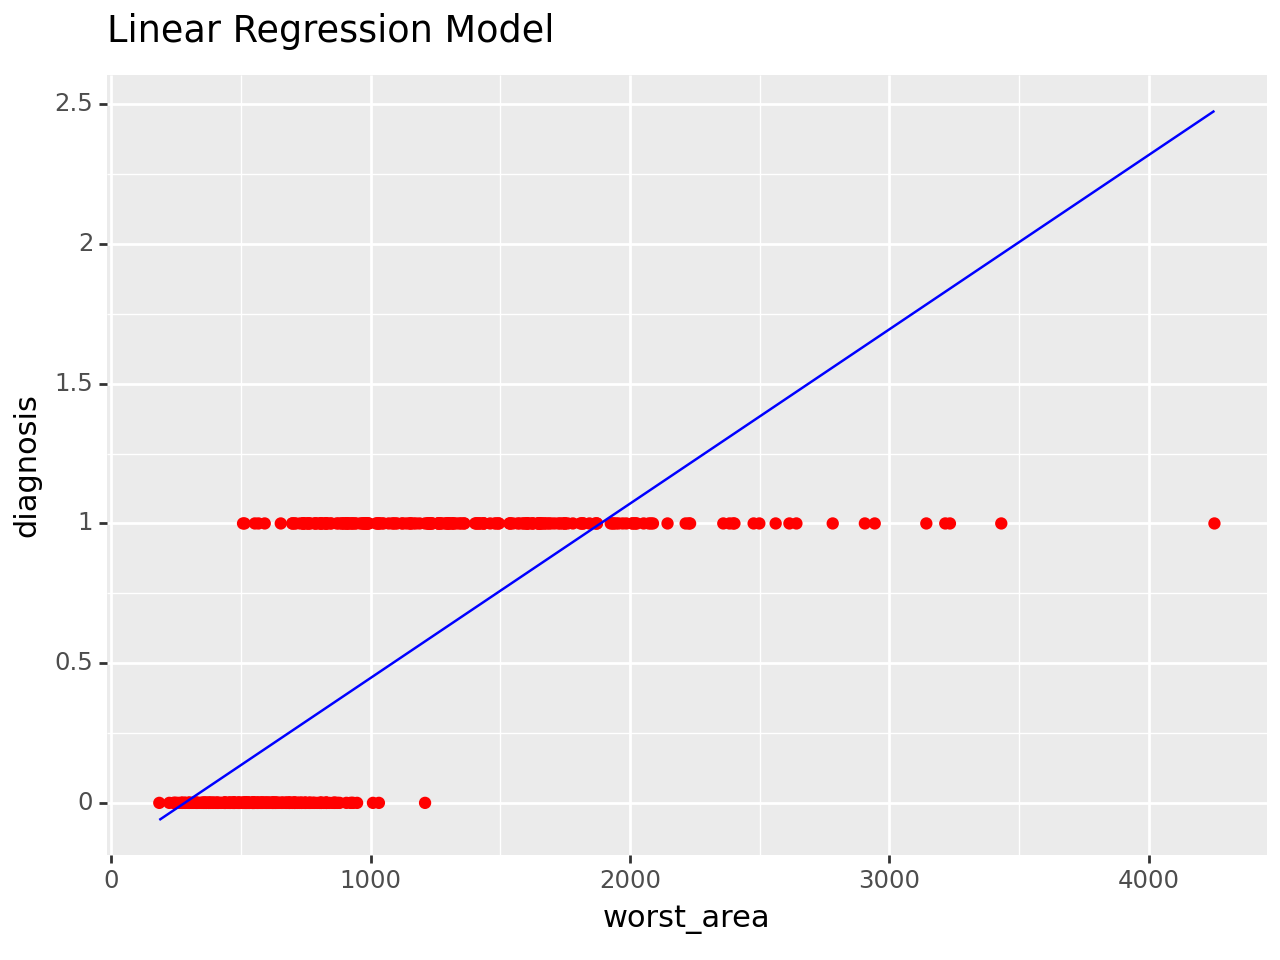

In [7]:
# Modelo de regresión lineal
modelo_reg_lineal = LinearRegression()
modelo_reg_lineal.fit(data_peor_area[['worst_area']], data_peor_area['diagnosis'])

# Visualización del modelo con ggplot
data_peor_area['predicciones_reg_lineal'] = modelo_reg_lineal.predict(data_peor_area[['worst_area']])
(ggplot(data_peor_area) +
 geom_point(aes(x='worst_area', y='diagnosis'), color='red') +
 geom_line(aes(x='worst_area', y='predicciones_reg_lineal'), color='blue') +
 labs(title='Linear Regression Model')).draw()

In [8]:
# Predicciones y probabilidades
# Modelo de regresión logística
X_train, X_test, y_train, y_test = train_test_split(data_peor_area[['worst_area']], data_peor_area['diagnosis'], test_size=0.3, random_state=42)
modelo_reg_logis = LogisticRegression()
modelo_reg_logis.fit(X_train, y_train)
data_peor_area['probabilidades_reg_logis'] = modelo_reg_logis.predict_proba(data_peor_area[['worst_area']])[:, 1]
data_peor_area

<ipython-input-8-4c7399ff6506>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,worst_area,diagnosis,predicciones_reg_lineal,probabilidades_reg_logis
0,2019.0,1,1.082620,0.999994
1,1956.0,1,1.043327,0.999988
2,1709.0,1,0.889272,0.999843
3,567.7,1,0.177437,0.048872
4,1575.0,1,0.805695,0.999379
...,...,...,...,...
564,2027.0,1,1.087610,0.999994
565,1731.0,1,0.902993,0.999875
566,1124.0,1,0.524404,0.939842
567,1821.0,1,0.959127,0.999950


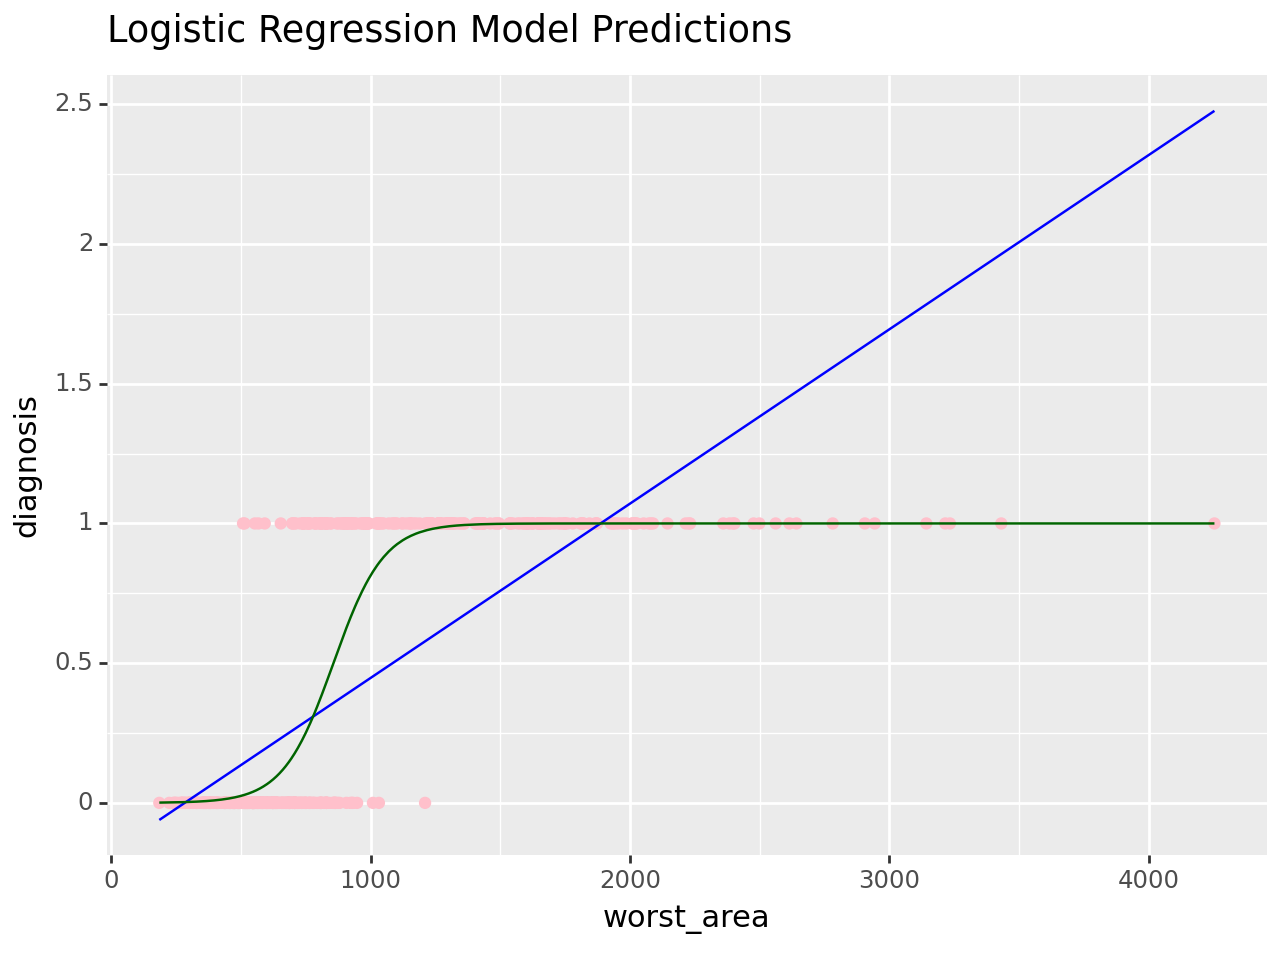

In [ ]:

# Visualización de las predicciones y probabilidades con ggplot
(ggplot(data_peor_area) +
 geom_point(aes(x='worst_area', y='diagnosis'), color='pink') +
 geom_line(aes(x='worst_area', y='predicciones_reg_lineal'), color='blue') +
 geom_line(aes(x='worst_area', y='probabilidades_reg_logis'), color='darkgreen') +
 labs(title='Logistic Regression Model Predictions')).draw()



In [ ]:
# Predicciones finales con el modelo de regresión logística
data_peor_area['prediccion'] = modelo_reg_logis.predict(data_peor_area[['worst_area']])
data_peor_area.head()

C:\Users\jcz_1\AppData\Local\Temp\ipykernel_25168\3862185032.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,worst_area,diagnosis,predicciones_reg_lineal,probabilidades_reg_logis,prediccion
0,2019.0,1,1.082620,0.999994,1
1,1956.0,1,1.043327,0.999988,1
2,1709.0,1,0.889272,0.999843,1
3,567.7,1,0.177437,0.048872,0
4,1575.0,1,0.805695,0.999379,1


# REGRESION LOGISTICA

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

url = "https://raw.githubusercontent.com/JuanCarlosCS19/ML_Toulouse_ENE_2024/main/Clase2/cancer_mama.csv"

# Cargar el conjunto de datos
mi_data = pd.read_csv(url)
# Modifica la columna 'diagnosis'
mi_data['diagnosis'] = mi_data['diagnosis'].replace({0: 1, 1: 0})

# Separación entrenamiento y prueba
variables_independientes = mi_data.drop('diagnosis', axis=1)
objetivo = mi_data['diagnosis']

indepen_entrenamiento, indepen_prueba, objetivo_entrenamiento, objetivo_prueba = train_test_split(variables_independientes,
                                                                                                  objetivo,
                                                                                                  test_size=0.3,
                                                                                                  random_state=42)

# Crea y entrena el modelo de regresión logística
modelo_rl = LogisticRegression(solver="liblinear")
modelo_rl.fit(indepen_entrenamiento, objetivo_entrenamiento.values.ravel())

# Realiza predicciones
predicciones = modelo_rl.predict(indepen_prueba)
predicciones_probabilidades = modelo_rl.predict_proba(indepen_prueba)[:, 1]
objetivos_reales = objetivo_prueba.values.ravel()

# Funciones para calcular métricas de clasificación
def VP(clases_reales, predicciones):
    return np.sum((clases_reales == 1) & (predicciones == 1))

def VN(clases_reales, predicciones):
    return np.sum((clases_reales == 0) & (predicciones == 0))

def FP(clases_reales, predicciones):
    return np.sum((clases_reales == 0) & (predicciones == 1))

def FN(clases_reales, predicciones):
    return np.sum((clases_reales == 1) & (predicciones == 0))

# Imprime métricas de clasificación
print("""
Verdaderos Positivos: {}
Verdaderos Negativos: {}
Falsos Positivos: {}
Falsos Negativos: {}
""".format(
    VP(objetivos_reales, predicciones),
    VN(objetivos_reales, predicciones),
    FP(objetivos_reales, predicciones),
    FN(objetivos_reales, predicciones)
))



Verdaderos Positivos: 59
Verdaderos Negativos: 106
Falsos Positivos: 2
Falsos Negativos: 4



In [ ]:


'''Exactitud (accuracy)'''
print(f"La metrica de exactitud es : {metrics.accuracy_score(objetivos_reales, predicciones)}")

'''Precisión'''

def precision_m(clases_reales, predicciones):
    vp = VP(clases_reales, predicciones)
    fp = FP(clases_reales, predicciones)
    return vp / (vp+fp)

precis = precision_m(objetivos_reales, predicciones)
print(f"La metrica de precision es : {precis}")
'''Sensibilidad'''

sensi = metrics.recall_score(objetivos_reales, predicciones)
print(f"La metrica de sensibilidad es : {sensi}")
'''Puntuación F1'''

f1_sc = metrics.f1_score(objetivos_reales, predicciones)

print(f"La metrica de F1 SCORE es : {f1_sc}")

La metrica de exactitud es : 0.9649122807017544
La metrica de precision es : 0.9672131147540983
La metrica de sensibilidad es : 0.9365079365079365
La metrica de F1 SCORE es : 0.9516129032258064


In [ ]:
exactitud = metrics.accuracy_score(objetivos_reales, predicciones)
precision = VP(objetivos_reales, predicciones) / (VP(objetivos_reales, predicciones) + FP(objetivos_reales, predicciones))
sensibilidad = metrics.recall_score(objetivos_reales, predicciones)
f1 = metrics.f1_score(objetivos_reales, predicciones)


In [ ]:
print(f"Exactitud: {exactitud}")
print(f"Precisión: {precision}")
print(f"Sensibilidad: {sensibilidad}")
print(f"Puntuación F1: {f1}")

# Convierte las probabilidades a etiquetas usando un umbral
def proba_a_etiqueta(predicciones_probabilidades, umbral=0.5):
    predicciones = np.zeros([len(predicciones_probabilidades), ])
    predicciones[predicciones_probabilidades >= umbral] = 1
    return predicciones

Exactitud: 0.9649122807017544
Precisión: 0.9672131147540983
Sensibilidad: 0.9365079365079365
Puntuación F1: 0.9516129032258064


In [ ]:
# Asegúrate de que proba_a_etiqueta devuelve un array unidimensional
predicciones_en_umbral = proba_a_etiqueta(predicciones_probabilidades, umbral=0.5)
predicciones_en_umbral


array([0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0.,
       1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0.])

In [ ]:
def evaluar_umbral(umbral):
    predicciones_en_umbral = proba_a_etiqueta(predicciones_probabilidades, umbral)
    precision_umbral = precision_m(objetivos_reales, predicciones_en_umbral)
    sensibilidad_umbral = metrics.recall_score(objetivos_reales, predicciones_en_umbral)
    F1_umbral = metrics.f1_score(objetivos_reales, predicciones_en_umbral)
    return (umbral,precision_umbral, sensibilidad_umbral, F1_umbral)

In [ ]:
evaluar_umbral(0.455)

(0.455, 0.967741935483871, 0.9523809523809523, 0.96)

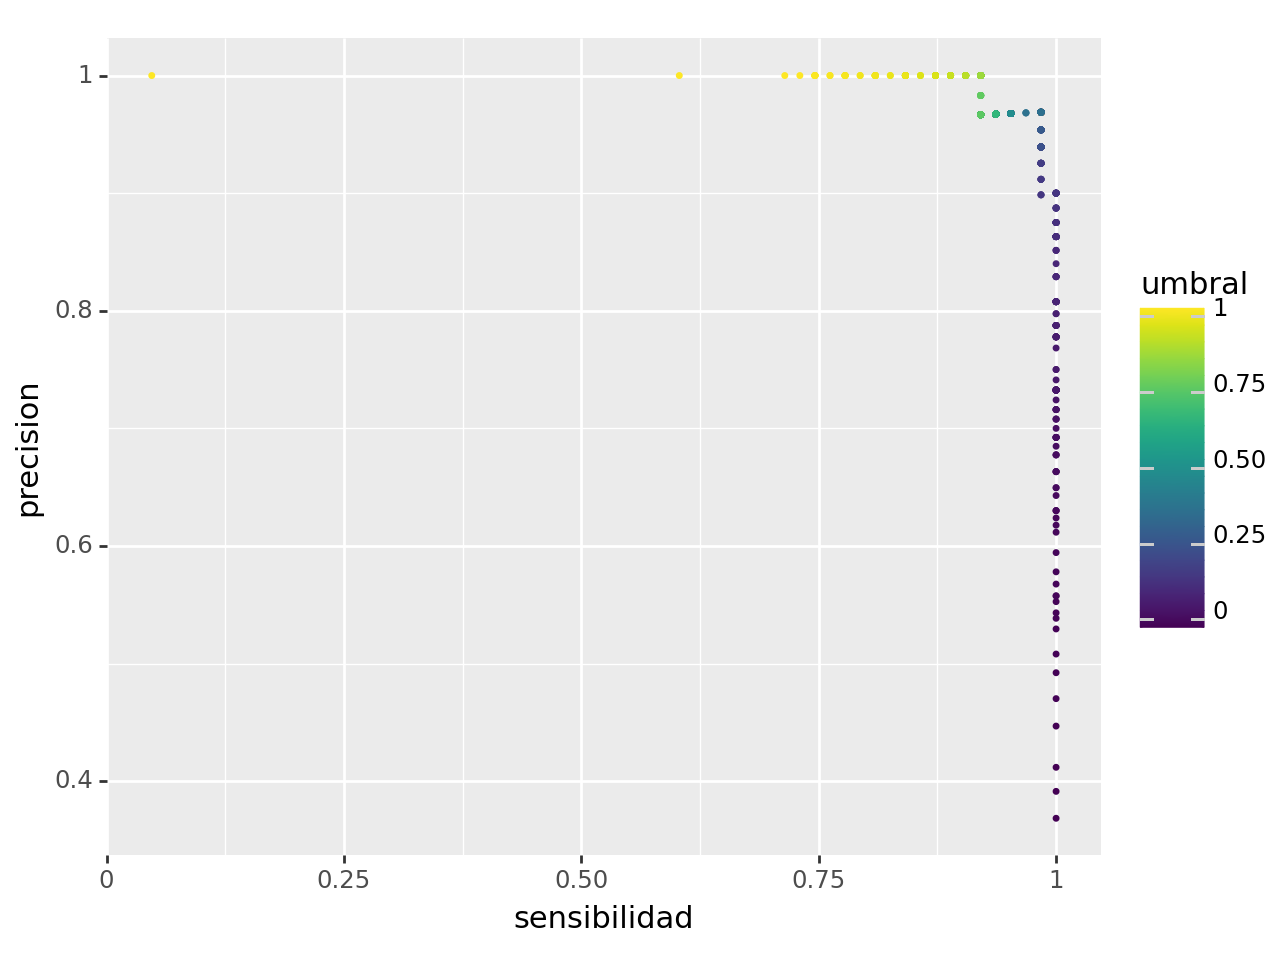

In [ ]:
umbrales = np.linspace(0., 1., 1000)

evaluaciones = pd.DataFrame([evaluar_umbral(x) for x in umbrales],
                            columns = ["umbral","precision","sensibilidad","F1"])


(ggplot(data = evaluaciones) +
    geom_point(mapping=aes(x="sensibilidad",y="precision",color="umbral"),size=0.4)
).draw()





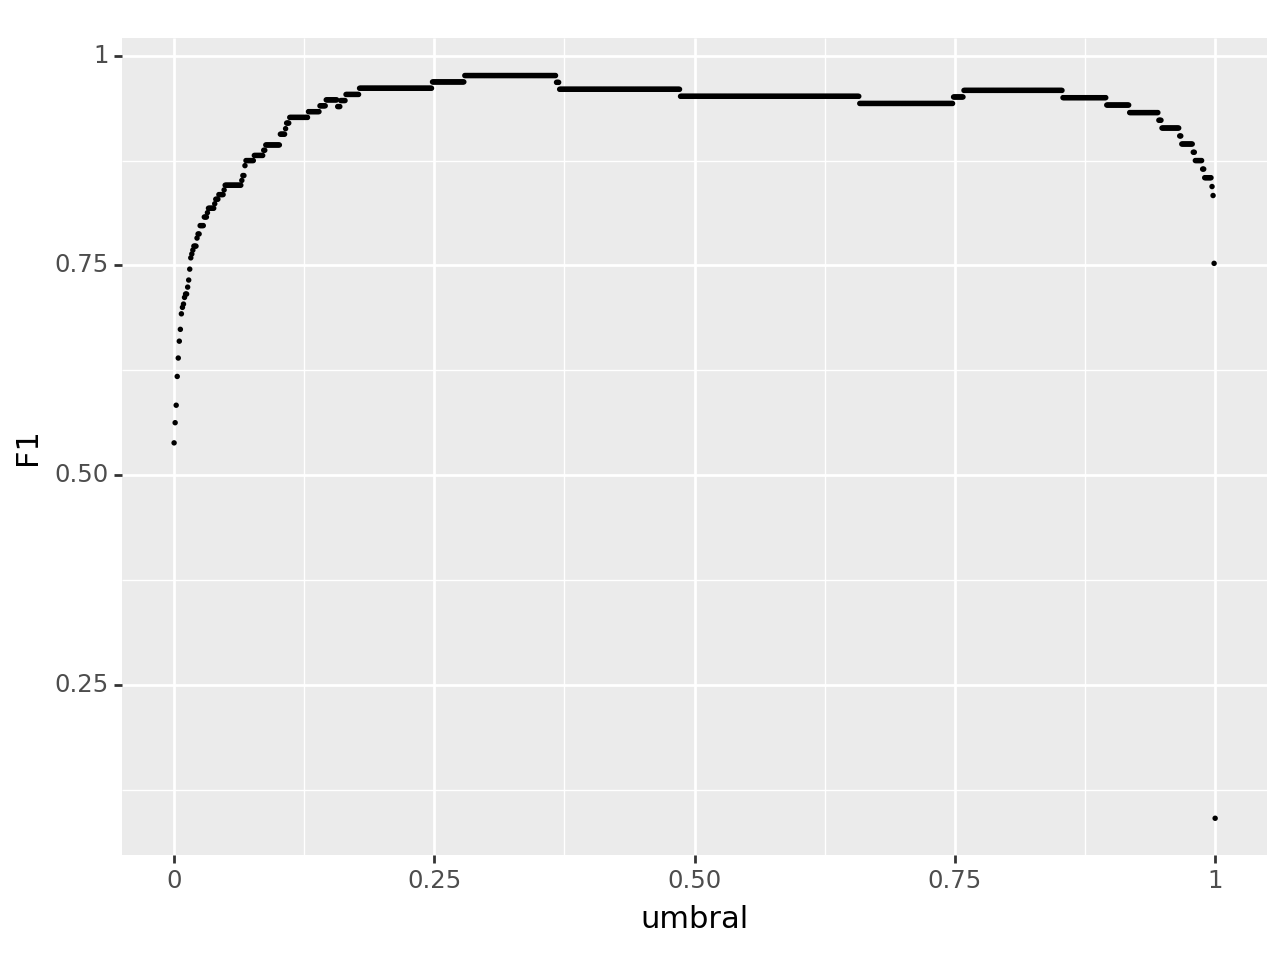

In [ ]:
(ggplot(data = evaluaciones) +
    geom_point(mapping=aes(x="umbral",y="F1"),size=0.1)
).draw()

In [ ]:

max_f1_value = evaluaciones["F1"].max()

# Filtrar las filas con el valor máximo de F1
max_f1_rows = evaluaciones[evaluaciones["F1"] == max_f1_value]

# Imprimir el resultado
print("Valor máximo de F1:", max_f1_value)
print("Filas con F1 máximo:")
print(max_f1_rows)


Valor máximo de F1: 0.9763779527559054
Filas con F1 máximo:
       umbral  precision  sensibilidad        F1
279  0.279279    0.96875      0.984127  0.976378
280  0.280280    0.96875      0.984127  0.976378
281  0.281281    0.96875      0.984127  0.976378
282  0.282282    0.96875      0.984127  0.976378
283  0.283283    0.96875      0.984127  0.976378
..        ...        ...           ...       ...
362  0.362362    0.96875      0.984127  0.976378
363  0.363363    0.96875      0.984127  0.976378
364  0.364364    0.96875      0.984127  0.976378
365  0.365365    0.96875      0.984127  0.976378
366  0.366366    0.96875      0.984127  0.976378

[88 rows x 4 columns]


In [ ]:
max_f1_rows.to_clipboard()